<a href="https://colab.research.google.com/github/Frans-Grau/P5-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt
import itertools
import pmdarima 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
### Load the Datasets
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])

### New column OP-Carrier code to full Airline Name
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA' 
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA' 
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9' 
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4' 
else 'Comair')

df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [3]:
### Group the delay minutes by date
df_delay = df_all.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()
df_delay = df_delay.sort_values('FL_DATE')
df_delay['Month'] = pd.DatetimeIndex(df_delay['FL_DATE']).month
df_delay = df_delay.sort_values('FL_DATE').set_index('FL_DATE')
df_delay.drop('Month', axis=1, inplace = True)
df_delay

,DEP_DELAY
FL_DATE,
2016-01-01,6.106262
2016-01-02,9.728279
2016-01-03,15.104025
2016-01-04,10.579281
2016-01-05,12.293303
...,...
2018-12-27,20.029929
2018-12-28,32.150881
2018-12-29,15.529323


In [11]:
# ### ARIMA 
# # Create the train set
train_set = df_delay.head(int(df_delay.shape[0]-273))
print('The minimum date we have is', train_set.index.min(), 'and the maximum date is ',  train_set.index.max())

# # Create the test set
test_set = df_delay[~df_delay.index.isin(train_set.index)]
print('The minimum date we have is', test_set.index.min(), 'and the maximum date is ',  test_set.index.max())

# # #fit model
# arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1))
# arima_model_fit = arima_model.fit()
# print(arima_model_fit.summary())

# # #forecast
# arima_model_fit.forecast()

The minimum date we have is 2016-01-01 00:00:00 and the maximum date is  2018-04-02 00:00:00
The minimum date we have is 2018-04-03 00:00:00 and the maximum date is  2018-12-31 00:00:00


In [13]:
### Grab all the predictions
allx = list(range(1,274))   #[::-1] 
allx.reverse()
# print(allx)

def forecastx(x):
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1))
    arima_model_fit = arima_model.fit()
    forecast  = arima_model_fit.forecast()
    return forecast
   

dep_delay_forecast = list(map(forecastx, allx))
dep_delay_forecast

c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978

[2018-04-03    10.784641
 Freq: D, dtype: float64,
 2018-04-04    10.706256
 Freq: D, dtype: float64,
 2018-04-05    10.54064
 Freq: D, dtype: float64,
 2018-04-06    7.554105
 Freq: D, dtype: float64,
 2018-04-07    10.242037
 Freq: D, dtype: float64,
 2018-04-08    7.918488
 Freq: D, dtype: float64,
 2018-04-09    7.452537
 Freq: D, dtype: float64,
 2018-04-10    8.686259
 Freq: D, dtype: float64,
 2018-04-11    6.842376
 Freq: D, dtype: float64,
 2018-04-12    5.417415
 Freq: D, dtype: float64,
 2018-04-13    6.317359
 Freq: D, dtype: float64,
 2018-04-14    6.989865
 Freq: D, dtype: float64,
 2018-04-15    7.098586
 Freq: D, dtype: float64,
 2018-04-16    15.902651
 Freq: D, dtype: float64,
 2018-04-17    18.338265
 Freq: D, dtype: float64,
 2018-04-18    9.015269
 Freq: D, dtype: float64,
 2018-04-19    6.467629
 Freq: D, dtype: float64,
 2018-04-20    8.291108
 Freq: D, dtype: float64,
 2018-04-21    7.044461
 Freq: D, dtype: float64,
 2018-04-22    6.753228
 Freq: D, dtype: floa

In [14]:
### Pass the resulting list to a DF, and then merging to test set to check the diff between actual and predicted
df1= pd.concat(dep_delay_forecast).to_frame()
evaluation = test_set
evaluation['Forecast'] = df1.values
evaluation

C:\Users\frans\AppData\Local\Temp\ipykernel_19992\1782221490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation['Forecast'] = df1.values


,DEP_DELAY,Forecast
FL_DATE,,
2018-04-03,12.306523,10.784641
2018-04-04,11.730656,10.706256
2018-04-05,5.262163,10.540640
2018-04-06,11.131015,7.554105
2018-04-07,6.083773,10.242037
...,...,...
2018-12-27,20.029929,7.669784
2018-12-28,32.150881,13.731372
2018-12-29,15.529323,19.611367


In [15]:
df1

,0
2018-04-03,10.784641
2018-04-04,10.706256
2018-04-05,10.540640
2018-04-06,7.554105
2018-04-07,10.242037
...,...
2018-12-27,7.669784
2018-12-28,13.731372
2018-12-29,19.611367
2018-12-30,12.778915


In [16]:
evaluation

,DEP_DELAY,Forecast
FL_DATE,,
2018-04-03,12.306523,10.784641
2018-04-04,11.730656,10.706256
2018-04-05,5.262163,10.540640
2018-04-06,11.131015,7.554105
2018-04-07,6.083773,10.242037
...,...,...
2018-12-27,20.029929,7.669784
2018-12-28,32.150881,13.731372
2018-12-29,15.529323,19.611367


<AxesSubplot:xlabel='FL_DATE'>

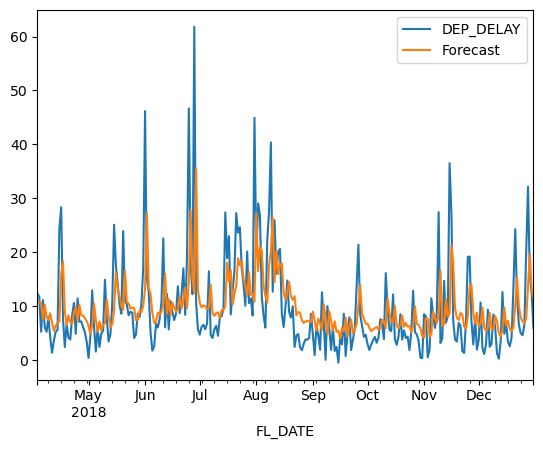

In [17]:
### Graphic representation of the DIFF_ 
evaluation.plot()

In [34]:
### ERRORS MEASUREMENTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

expected = evaluation['DEP_DELAY']
predicted = evaluation['Forecast']

## Mean Forecast Error
forecast_errors = [expected[i]-predicted[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Mean Forecast Error - Bias: %f' % bias)

## Mean Absolute Error
mae = mean_absolute_error(expected, predicted)
print('Mean absolute error : %f' % mae)

## Mean Squared Error if = 0 Means NO ERROR
mse = mean_squared_error(expected, predicted)
print('Mean Squared Error: %f' % mse)

## Root Mean Squared Error if = 0 Means NO ERROR
rmse = sqrt(mse)
print('Root Mean Squared Error: %f' % rmse)

Mean Forecast Error - Bias: -0.219678
Mean absolute error : 5.190586
Mean Squared Error: 59.935170
Root Mean Squared Error: 7.741781


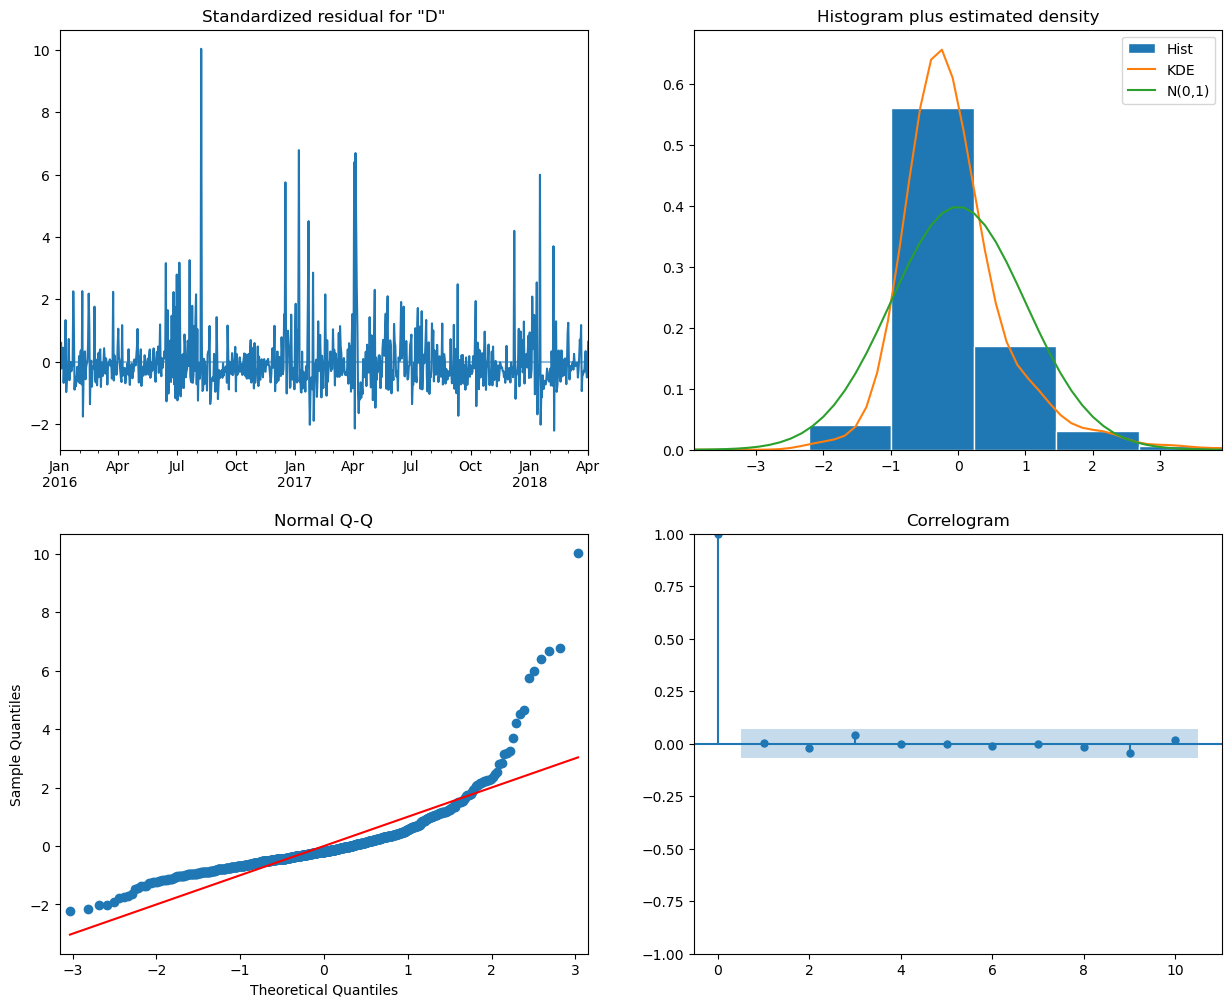

In [ ]:
arima_model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

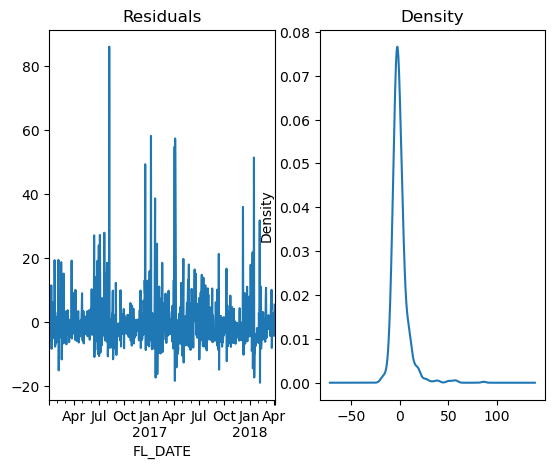

In [ ]:
### Check for residuals
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='FL_DATE'>

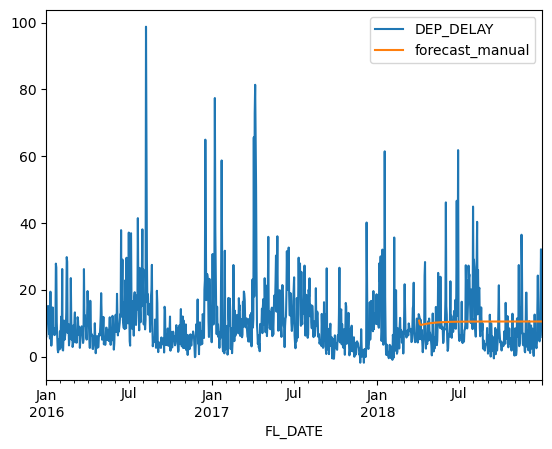

In [ ]:

forecast_test = arima_model_fit.forecast(len(test_set))

df_delay['forecast_manual'] = [None]*len(train_set) + list(forecast_test)

df_delay.plot()

c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


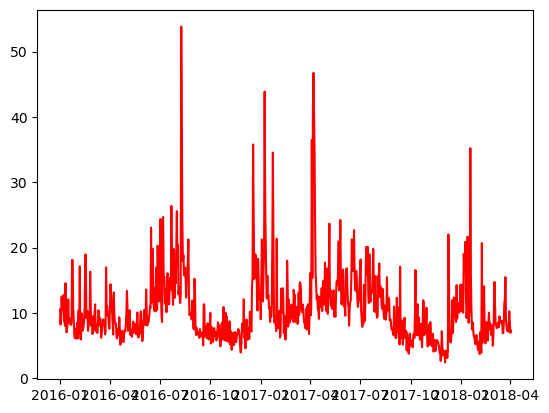

In [ ]:
results = arima_model.fit()
plt.plot(results.fittedvalues, color = 'red')

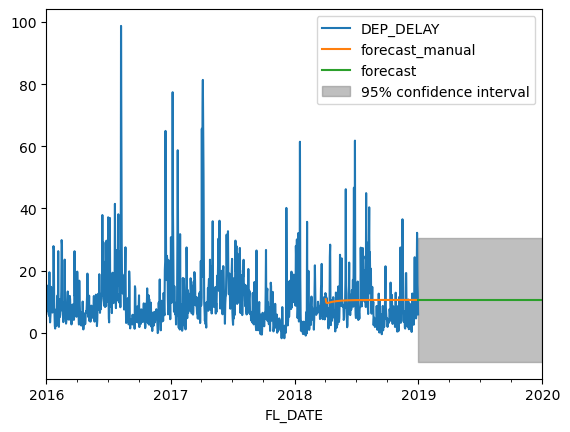

In [ ]:
fig, ax = plt.subplots()
ax = df_delay.plot(ax=ax)
plot_predict(results,'2019','2020',ax=ax)
plt.show()
